In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [72]:
observation = pd.read_csv("./094/observation.csv", sep='\t', engine="python")

## 2.1 A

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
y = observation['oximetry'].values
x = observation.drop(columns=['oximetry'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train_df = X_train.copy()
# train_df["oximetry"] = y_train
# 
# test_df = X_test.copy()
# test_df["oximetry"] = y_test
# 
# train_df.to_csv("train_raw.csv", index=False)
# test_df.to_csv("test_raw.csv", index=False)

Here we divided our dataset into training and testing sets

## 2.1 B

In [75]:
import pandas as pd

X_train = pd.DataFrame(X_train)

### Check types

In [76]:
X_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
dtype: object

### Check nulls

In [77]:
from sklearn.impute import SimpleImputer

if X_train.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X_train = imputer.fit_transform(X_train)

If there are missing values here, we will replace them with the median 

### Check duplicates

In [78]:
if X_train.duplicated().sum() > 0:
    X_train = X_train.drop_duplicates()
    y_train = y_train.loc[X_train.index]

If there are duplicates here, we will remove them

## 2.1 C


### Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X_mm = scaler.fit_transform(X_train) 

X_mm

array([[0.45276178, 0.50565087, 0.25645509, ..., 0.68601394, 0.603708  ,
        0.17673603],
       [0.58886547, 0.55577968, 0.6179188 , ..., 0.0551144 , 0.79828603,
        0.23083105],
       [0.5288536 , 0.46830527, 0.31574099, ..., 0.953799  , 1.        ,
        0.51727084],
       ...,
       [0.41719763, 0.53771322, 0.31790977, ..., 0.63543271, 0.66930273,
        0.70221359],
       [0.53492046, 0.5403468 , 0.34789105, ..., 0.55731244, 0.68780225,
        0.69049618],
       [0.56248983, 0.36472526, 0.40685264, ..., 0.74105148, 0.97613058,
        0.54000764]])

In [80]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_std = scaler.fit_transform(X_train) 

X_std

array([[-0.61285113,  0.16958797, -1.02446594, ...,  0.65197328,
        -0.44608858, -1.4207134 ],
       [ 0.46388163,  0.5730105 ,  0.86314176, ..., -1.53898888,
         0.60766575, -1.17568571],
       [-0.01087947, -0.1309589 , -0.71486771, ...,  1.58192631,
         1.70006538,  0.12176615],
       ...,
       [-0.8942034 ,  0.42761672, -0.70354212, ...,  0.47631684,
        -0.09085455,  0.95947903],
       [ 0.03711616,  0.448811  , -0.5469762 , ...,  0.20502395,
         0.00933123,  0.90640411],
       [ 0.25522079, -0.96454168, -0.23907157, ...,  0.84310539,
         1.57079847,  0.22475429]])

In [81]:
print("StandardScaler:")
print("Mean: ", np.mean(X_train, axis=0).round(3))
print("Std: ", np.std(X_train, axis=0).round(3))

print("\nMinMaxScaler:")
print("Min: ", np.min(X_train, axis=0).round(3))
print("Max: ", np.max(X_train, axis=0).round(3))

StandardScaler:
Mean:  0      97.541
1      79.383
2       8.724
3      16.139
4      39.649
5      59.381
6     117.756
7     104.438
8      35.982
9      10.948
10     15.311
11     14.717
12     80.903
13      4.099
14     45.595
15     47.458
16     46.789
17     49.718
18      0.249
19     29.965
20     29.998
21      7.550
dtype: float64
Std:  0      0.606
1      4.970
2      3.496
3      1.036
4      1.429
5     10.745
6     21.867
7      4.088
8      0.846
9      1.447
10     1.583
11     0.719
12     4.982
13     0.135
14    12.267
15    11.966
16    12.199
17    14.054
18     0.029
19     5.759
20    22.823
21    73.843
dtype: float64

MinMaxScaler:
Min:  0      95.000
1      60.000
2       0.460
3      12.000
4      35.194
5      21.000
6      36.951
7      90.000
8      33.000
9       5.736
10     10.000
11     12.059
12     60.000
13      4.000
14      1.091
15      0.000
16      0.000
17      0.000
18      0.200
19     20.000
20    -54.800
21   -156.474
dtype: float64
Max

In [82]:
print("StandardScaler:")
print("Mean: ", np.mean(X_std, axis=0).round(3))
print("Std: ", np.std(X_std, axis=0).round(3))

print("\nMinMaxScaler:")
print("Min: ", np.min(X_mm, axis=0).round(3))
print("Max: ", np.max(X_mm, axis=0).round(3))

StandardScaler:
Mean:  [-0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0.
  0. -0.  0.  0.]
Std:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

MinMaxScaler:
Min:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


After applying **StandardScaler**, the average value of each feature became close to 0, and the standard deviation became close to 1, confirming that the data was scaled correctly.

After applying **MinMaxScaler**, the minimum values of the features became equal to 0, and the maximum values became equal to 1, also confirming that the normalization worked correctly.

### Transformers

(array([   6.,   64.,  285., 1054., 2476., 2959., 1972.,  718.,  115.,
          15.]),
 array([95.        , 95.47914432, 95.95828863, 96.43743295, 96.91657726,
        97.39572158, 97.8748659 , 98.35401021, 98.83315453, 99.31229884,
        99.79144316]),
 <BarContainer object of 10 artists>)

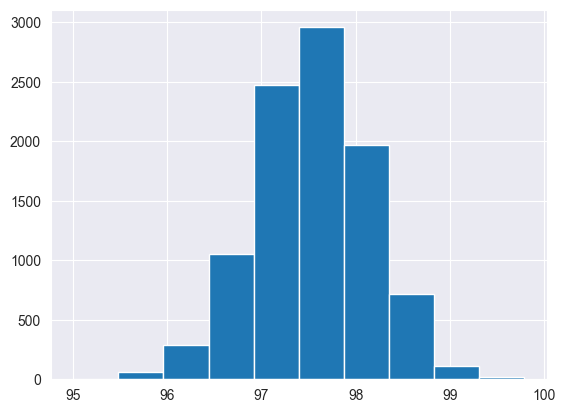

In [83]:
from matplotlib import pyplot

pyplot.hist(X_train[0], bins=10)

Our initial histogram of the distribution of feature values

(array([2., 2., 4., 2., 6., 2., 3., 0., 0., 1.]),
 array([-1.38342243, -1.02586155, -0.66830067, -0.3107398 ,  0.04682108,
         0.40438196,  0.76194284,  1.11950372,  1.4770646 ,  1.83462548,
         2.19218636]),
 <BarContainer object of 10 artists>)

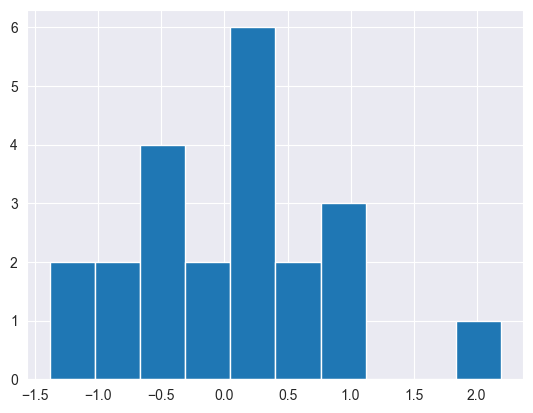

In [84]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson', standardize=True) 
X_pt = power.fit_transform(X_train)

pyplot.hist(X_pt[0], bins=10) 

After **PowerTransformer**

(array([1., 3., 4., 0., 7., 4., 2., 0., 0., 1.]),
 array([-1.52955819, -1.15861239, -0.78766659, -0.41672079, -0.04577499,
         0.32517081,  0.69611661,  1.06706241,  1.43800821,  1.80895401,
         2.17989981]),
 <BarContainer object of 10 artists>)

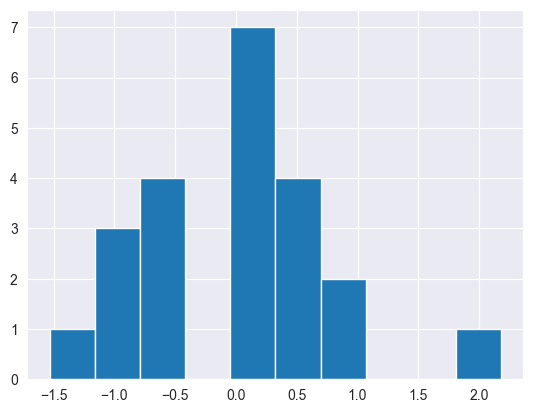

In [85]:
from sklearn.preprocessing import QuantileTransformer

power = QuantileTransformer(output_distribution='normal', random_state=42)
X_qt = power.fit_transform(X_train)

pyplot.hist(X_qt[0], bins=10)

After **QuantileTransformer**

In [86]:
from scipy.stats import skew

skews = skew(X_train, axis=0)

skew_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Skewness': skews
})

skew_df

,Feature,Skewness
0,0,-0.091429
1,1,0.012986
2,2,0.205774
3,3,-0.022859
4,4,0.027332
5,5,0.021505
6,6,0.006685
7,7,0.008181
8,8,-0.420300
9,9,0.120718


Here we check whether the distribution is normal

## 2.1 D

We divided our dataset into **training** (80%) and **test** (20%) samples

Further work was carried out only with the **training** sample

We compared two approaches - **scaling** and **transformation** - and analyzed the distribution of features (checked for skew) to assess how close the data was to a normal distribution

Most features had a normal distribution, but the presence of some skewed features led us to decide to use **QuantileTransformer** for subsequent data preprocessing

## 2.2 A

### Correlation analysis (linear relationship)

In [87]:
x_1 = observation.drop(columns=['oximetry'], axis=1)

X_qt_df = pd.DataFrame(X_qt, columns=x_1.columns)
df_corr = X_qt_df.copy()
df_corr["oximetry"] = y_train

corr_matrix = df_corr.corr(numeric_only=True)

corr_sorted = corr_matrix["oximetry"].reindex(corr_matrix["oximetry"].abs().sort_values(ascending=False).index)
corr_sorted

oximetry                 1.000000
PVI                      0.642734
Skin Temperature         0.372155
EtCO₂                    0.270198
SpO₂                    -0.132310
PI                      -0.112210
Motion/Activity index    0.031508
CO                       0.016163
HR                       0.015967
SNR                      0.015428
PRV                     -0.014076
FiO₂                     0.012685
SV                      -0.012292
RR                      -0.010047
PPG waveform features    0.007412
longitude               -0.007313
O₂ extraction ratio      0.006902
Hb level                 0.004157
Respiratory effort      -0.003094
Blood Flow Index         0.001830
Signal Quality Index     0.001720
BP                      -0.001159
latitude                 0.000247
Name: oximetry, dtype: float64

#### Calculation of correlation between attributes and target variable
Pearson's correlation was calculated to assess the linear relationship between variables.
Before calculation, the input data was standardized (X_qt). 
The target variable **oximetry** was temporarily added to the dataset to calculate the correlation coefficients between it and the other attributes. 
The attributes were then sorted by absolute correlation value in descending order, identifying the most significant variables.

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


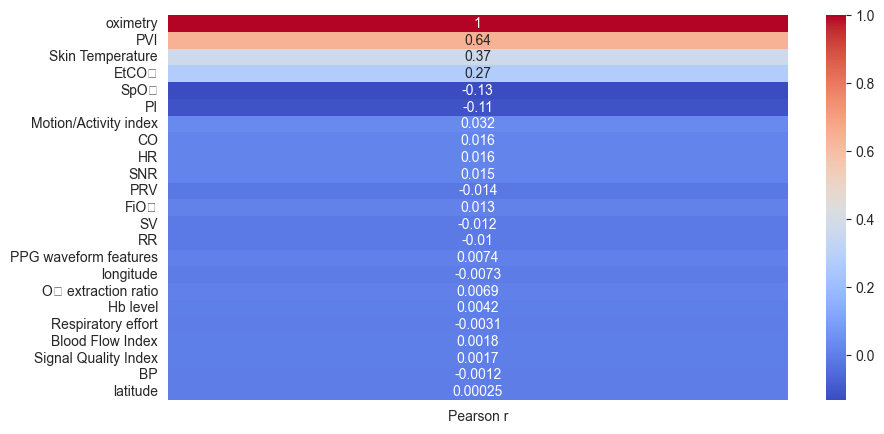

In [88]:
plt.figure(figsize=(10,5))
# sns.heatmap(corr_sorted, annot=True, cmap='coolwarm')
sns.heatmap(corr_sorted.to_frame(name="Pearson r"), annot=True, cmap="coolwarm")
plt.show()

### ANOVA F-test

In [89]:
X = pd.DataFrame(X_qt, columns=x_1.columns)
y = y_train

scores, pvals = f_regression(X, y)

anova_results = (
    pd.DataFrame({'Feature': X.columns, 'F_value': scores, 'p_value': pvals})
      .sort_values('F_value', ascending=False, ignore_index=True)
)

print(anova_results)

                  Feature      F_value        p_value
0                     PVI  6800.983053   0.000000e+00
1        Skin Temperature  1553.309465  3.622640e-315
2                   EtCO₂   760.945030  2.655408e-161
3                    SpO₂   172.156881   5.383525e-39
4                      PI   123.206404   1.866894e-28
5   Motion/Activity index     9.601272   1.950008e-03
6                      CO     2.524714   1.121078e-01
7                      HR     2.463959   1.165176e-01
8                     SNR     2.300290   1.293826e-01
9                     PRV     1.914709   1.664730e-01
10                   FiO₂     1.554942   2.124376e-01
11                     SV     1.460180   2.269311e-01
12                     RR     0.975437   3.233527e-01
13  PPG waveform features     0.530829   4.662760e-01
14              longitude     0.516736   4.722549e-01
15    O₂ extraction ratio     0.460278   4.975105e-01
16               Hb level     0.166934   6.828603e-01
17     Respiratory effort   

#### Selecting attributes using the ANOVA F-test
The **f_regression** test was used to assess the linear relationship between individual attributes and the target variable **oximetry**.  
For each attribute, the value of the **F-statistic** and the corresponding **p-values** are calculated separately, which show how strongly the attribute is related to the target variable.  
Higher F values and lower p-values mean that the attribute has a greater influence on the target variable.

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


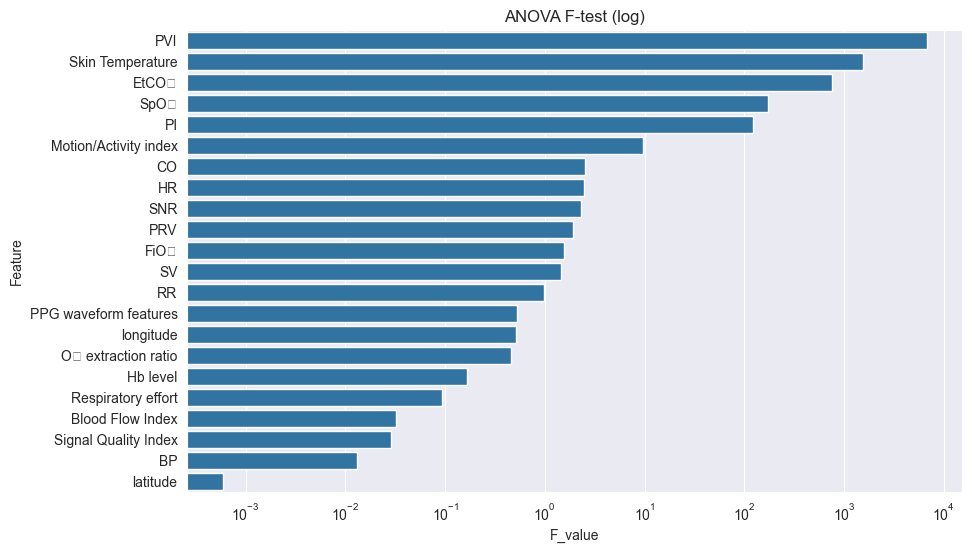

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(data=anova_results, x='F_value', y='Feature')
plt.xscale('log')
plt.title('ANOVA F-test (log)')
plt.show()

### Mutual Information (non-linear dependence)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


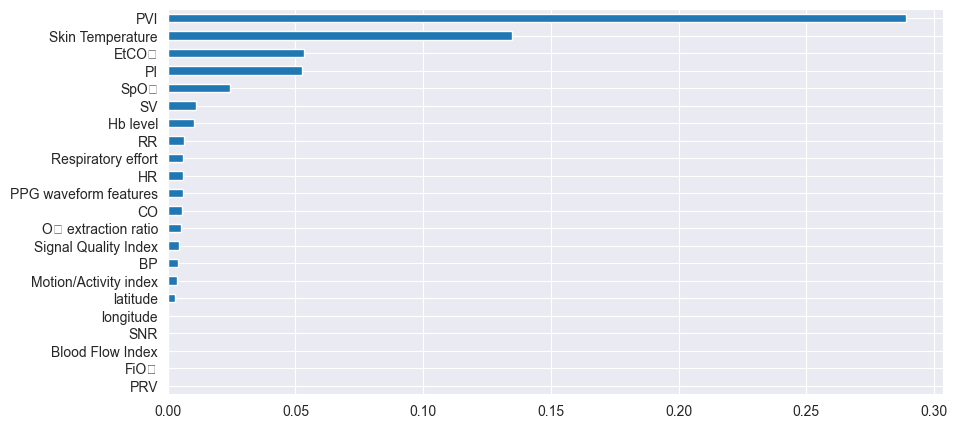

PVI                      0.288991
Skin Temperature         0.134827
EtCO₂                    0.053401
PI                       0.052582
SpO₂                     0.024435
SV                       0.011165
Hb level                 0.010096
RR                       0.006189
Respiratory effort       0.005998
HR                       0.005961
PPG waveform features    0.005812
CO                       0.005423
O₂ extraction ratio      0.005199
Signal Quality Index     0.004224
BP                       0.003834
Motion/Activity index    0.003454
latitude                 0.002708
longitude                0.000000
PRV                      0.000000
SNR                      0.000000
Blood Flow Index         0.000000
FiO₂                     0.000000
dtype: float64


In [91]:
X = pd.DataFrame(X_qt, columns=x_1.columns) 
y = y_train 

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

scores = pd.Series(abs(selector.scores_), index=X.columns).sort_values()

plt.figure(figsize=(10,5))
scores.plot(kind='barh')
plt.show()

print(scores.sort_values(ascending=False))

#### Mutual Information Calculation
The **mutual_info_regression** method was used to identify nonlinear relationships between attributes and the target variable **oximetry**. A higher MI value indicates a stronger (not necessarily linear) relationship.  

In [92]:
cmp_simple = pd.concat([
    corr_sorted.drop('oximetry', errors='ignore').abs().rename('|r|'),
    anova_results.set_index('Feature')['F_value'].rename('ANOVA_F'),
    scores.rename('Mutual_Info')
], axis=1)

norm = (cmp_simple - cmp_simple.min()) / (cmp_simple.max() - cmp_simple.min())

final_display = (norm.assign(Mean_Score=norm.mean(axis=1)).sort_values('Mean_Score', ascending=False))

display(cmp_simple.sort_values('|r|', ascending=False))
display(final_display.style.format('{:.6f}'))

,|r|,ANOVA_F,Mutual_Info
PVI,0.642734,6800.983053,0.288991
Skin Temperature,0.372155,1553.309465,0.134827
EtCO₂,0.270198,760.945030,0.053401
SpO₂,0.132310,172.156881,0.024435
PI,0.112210,123.206404,0.052582
Motion/Activity index,0.031508,9.601272,0.003454
CO,0.016163,2.524714,0.005423
HR,0.015967,2.463959,0.005961
SNR,0.015428,2.300290,0.000000
PRV,0.014076,1.914709,0.000000


,|r|,ANOVA_F,Mutual_Info,Mean_Score
PVI,1.000000,1.000000,1.000000,1.000000
Skin Temperature,0.578856,0.228395,0.466543,0.424598
EtCO₂,0.420165,0.111887,0.184785,0.238946
PI,0.174265,0.018116,0.181950,0.124777
SpO₂,0.205550,0.025313,0.084553,0.105139
Motion/Activity index,0.048656,0.001412,0.011954,0.020674
SV,0.018749,0.000215,0.038633,0.019199
HR,0.024468,0.000362,0.020629,0.015153
CO,0.024773,0.000371,0.018765,0.014636
Hb level,0.006086,0.000024,0.034934,0.013682


#### Normalisation of values
Since individual metrics (Pearson, ANOVA, MI) have different ranges of values,
they were normalised using **minimum-maximum scaling** to the interval ⟨0, 1⟩.

## 2.2 B

### (B-1b) Ranking of identified attributes by importance

All analysed attributes were ranked by their combined **Mean_Score**,
which was obtained as the average of the normalised values of three different methods:
Pearson |r|, ANOVA F, and Mutual Information.
This made it possible to determine the relative importance of each attribute
in relation to the target variable **oximetry**.

The table above shows the complete ranking of all attributes,
where a higher **Mean_Score** value indicates greater attribute significance.
For better visualisation, the 5 attributes with the highest scores are shown separately below.

,|r|,ANOVA_F,Mutual_Info,Mean_Score
PVI,1.000000,1.000000,1.000000,1.000000
Skin Temperature,0.578856,0.228395,0.466543,0.424598
EtCO₂,0.420165,0.111887,0.184785,0.238946
PI,0.174265,0.018116,0.181950,0.124777
SpO₂,0.205550,0.025313,0.084553,0.105139


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


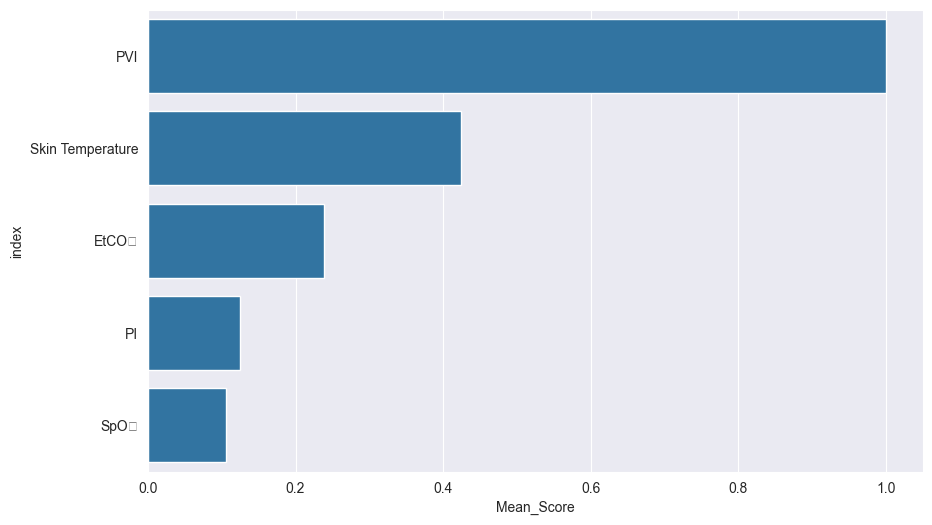

In [93]:
ranked_f = final_display.sort_values('Mean_Score', ascending=False).head(5).copy()
display(ranked_f.style.format('{:.6f}'))

topk = (final_display.reset_index().head(5))

plt.figure(figsize=(10,6))
sns.barplot(data=topk, x='Mean_Score', y='index')
plt.show()

## 2.2 C
### (C-1b) Justification of decisions during implementation

When solving the problem, we used three approaches to assess the importance of attributes:
**Pearson's correlation**, **ANOVA F-test**, and **Mutual Information**.  
These three methods provide different insights into how the input variables are related to the target variable *oximetry*:

**Pearson's correlation** reflects the linear relationship between the attribute and the target.  

**ANOVA F-test** determines whether there are significant differences in the mean values between groups of values.

**Mutual information** shows how much information one attribute provides about another, i.e. it also reveals non-linear relationships.

By combining these three methods, I was able to compare linear and nonlinear relationships
and get a better idea of which attributes are most important for the task.

I then **normalised the results using min–max transformation** to the interval ⟨0, 1⟩,
so that values from different methods with different ranges could be compared.  
From these normalised values, I calculated the **Mean Score**,
which shows the overall importance of each attribute.

This approach helped me compare the results from several points of view,
eliminate differences in scales, and obtain a clear order of attributes depending on their influence on the *oximetry* variable.

## 2.3 A 

In [94]:
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(X_train)

X_train_imp = num_imputer.transform(X_train)
X_test_imp  = num_imputer.transform(X_test)

power = QuantileTransformer(output_distribution='normal', random_state=42)
power.fit(X_train_imp)

X_train_pt = power.transform(X_train_imp)
X_test_pt  = power.transform(X_test_imp)

## 2.3 B


In [95]:
model = make_pipeline(SimpleImputer(strategy="median"), QuantileTransformer(output_distribution='normal', random_state=42), Ridge(random_state=42))

model.fit(X_train, y_train)

r2 = model.score(X_test, y_test)
print(f"R^2 test: {r2:.4f}")

y_pred_all = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_all))
print("MSE:", mean_squared_error(y_test, y_pred_all))


R^2 test: 0.4719
MAE: 0.2881102908210167
MSE: 0.12555091292711232


The model achieved R² = 0.4719, which means that it explains about 47% of the variability in the target variable of oximetry.
It is not perfect, but it shows that the model reflects a significant portion of the relationships in the data.
The average error MAE = 0.288 means that the predictions differ from the actual values by an average of approximately 0.29,
which is acceptable for health data.
MSE = 0.126 confirms that most predictions are relatively close to the correct values.
Overall, the model predicts fairly well, and the result can be considered a moderately good basis for further improvement.